In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("肝硬化预测数据集.csv")

In [3]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [4]:
#对类别型特征进行编码,处理成为机器学习模型可以识别的数值型变量
from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder()
for col in df.select_dtypes('O').columns:
    df[col] = labeler.fit_transform(df[col])
    print(dict(zip(labeler.classes_,labeler.transform(labeler.classes_ ))))

{'C': 0, 'CL': 1, 'D': 2}
{'D-penicillamine': 0, 'Placebo': 1, nan: 2}
{'F': 0, 'M': 1}
{'N': 0, 'Y': 1, nan: 2}
{'N': 0, 'Y': 1, nan: 2}
{'N': 0, 'Y': 1, nan: 2}
{'N': 0, 'S': 1, 'Y': 2}


In [5]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,2,2,24472,0,2,2,2,0,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,0,2,14245,0,2,2,2,0,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,0,2,20819,0,2,2,2,0,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,0,2,21185,0,2,2,2,0,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [6]:
# 字段、缺失情况、类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    int32  
 3   Drug           418 non-null    int32  
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    int32  
 6   Ascites        418 non-null    int32  
 7   Hepatomegaly   418 non-null    int32  
 8   Spiders        418 non-null    int32  
 9   Edema          418 non-null    int32  
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [7]:
df=df.fillna(value=0)#缺失值填补

In [8]:
df.duplicated().sum()#检测缺失值为0

0

In [9]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,2,2,24472,0,2,2,2,0,1.2,0.0,2.96,0.0,0.0,0.00,0.0,174.0,10.9,3.0
414,415,1103,0,2,14245,0,2,2,2,0,0.9,0.0,3.83,0.0,0.0,0.00,0.0,180.0,11.2,4.0
415,416,1055,0,2,20819,0,2,2,2,0,1.6,0.0,3.42,0.0,0.0,0.00,0.0,143.0,9.9,3.0
416,417,691,0,2,21185,0,2,2,2,0,0.8,0.0,3.75,0.0,0.0,0.00,0.0,269.0,10.4,3.0


In [10]:
x = df.iloc[:,:-1]
y = df['Stage']

In [11]:
x

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,1,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,2,2,24472,0,2,2,2,0,1.2,0.0,2.96,0.0,0.0,0.00,0.0,174.0,10.9
414,415,1103,0,2,14245,0,2,2,2,0,0.9,0.0,3.83,0.0,0.0,0.00,0.0,180.0,11.2
415,416,1055,0,2,20819,0,2,2,2,0,1.6,0.0,3.42,0.0,0.0,0.00,0.0,143.0,9.9
416,417,691,0,2,21185,0,2,2,2,0,0.8,0.0,3.75,0.0,0.0,0.00,0.0,269.0,10.4


# 特征工程

<Axes: title={'center': 'Feature Importance'}>

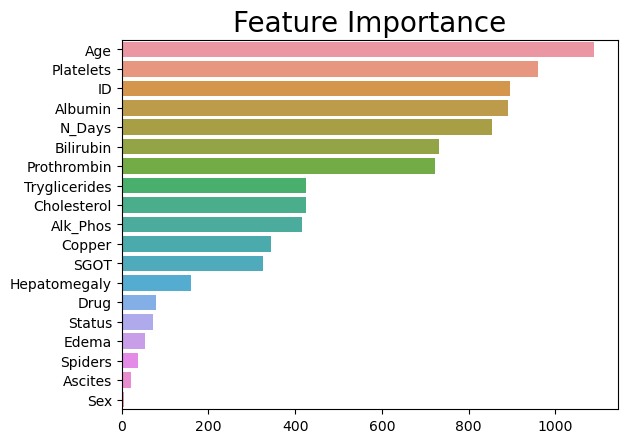

In [12]:
#通过构建树模型分析特征重要性
from lightgbm import LGBMClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(dpi=100)
clf = LGBMClassifier()
clf = clf.fit(x,y)
fi = sorted(zip(clf.feature_name_, clf.feature_importances_),key= lambda x:x[1])
plt.title("Feature Importance",fontsize=20)
sns.barplot(x=[j for i,j in fi[::-1]], y=[i for i,j in fi[::-1]],orient='h')

In [13]:
#特征选择
delete_corr = ['Sex','Ascites','Spiders','Edema','Status','Drug']

In [14]:
fi_ = [(i,j) for i,j in fi if i not in delete_corr]

In [15]:
feature_names = [i for i,j in fi_]
print(feature_names)

['Hepatomegaly', 'SGOT', 'Copper', 'Alk_Phos', 'Cholesterol', 'Tryglicerides', 'Prothrombin', 'Bilirubin', 'N_Days', 'Albumin', 'ID', 'Platelets', 'Age']


In [16]:
x[feature_names]

,Hepatomegaly,SGOT,Copper,Alk_Phos,Cholesterol,Tryglicerides,Prothrombin,Bilirubin,N_Days,Albumin,ID,Platelets,Age
0,1,137.95,156.0,1718.0,261.0,172.0,12.2,14.5,400,2.60,1,190.0,21464
1,1,113.52,54.0,7394.8,302.0,88.0,10.6,1.1,4500,4.14,2,221.0,20617
2,0,96.10,210.0,516.0,176.0,55.0,12.0,1.4,1012,3.48,3,151.0,25594
3,1,60.63,64.0,6121.8,244.0,92.0,10.3,1.8,1925,2.54,4,183.0,19994
4,1,113.15,143.0,671.0,279.0,72.0,10.9,3.4,1504,3.53,5,136.0,13918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2,0.00,0.0,0.0,0.0,0.0,10.9,1.2,681,2.96,414,174.0,24472
414,2,0.00,0.0,0.0,0.0,0.0,11.2,0.9,1103,3.83,415,180.0,14245
415,2,0.00,0.0,0.0,0.0,0.0,9.9,1.6,1055,3.42,416,143.0,20819
416,2,0.00,0.0,0.0,0.0,0.0,10.4,0.8,691,3.75,417,269.0,21185


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.5,random_state=1)

# 随机森林建模

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=922)
RFC.fit(xtrain,ytrain)
p = RFC.predict(xtest)

In [19]:
p

array([2., 4., 4., 1., 3., 3., 3., 3., 4., 4., 3., 3., 2., 3., 2., 3., 4.,
       4., 3., 4., 3., 3., 4., 4., 3., 3., 3., 3., 3., 3., 4., 3., 3., 4.,
       3., 3., 3., 3., 3., 3., 3., 2., 3., 4., 4., 3., 3., 2., 2., 3., 4.,
       3., 3., 3., 4., 4., 3., 3., 3., 3., 2., 4., 4., 3., 3., 2., 2., 3.,
       3., 4., 3., 4., 3., 3., 3., 3., 4., 3., 3., 4., 4., 3., 3., 3., 2.,
       3., 3., 4., 3., 4., 4., 3., 4., 4., 2., 3., 3., 3., 4., 2., 2., 3.,
       3., 3., 3., 4., 4., 2., 3., 4., 4., 2., 3., 3., 3., 4., 3., 3., 3.,
       2., 4., 3., 3., 3., 3., 4., 3., 4., 4., 3., 4., 3., 3., 3., 4., 2.,
       3., 3., 4., 3., 4., 3., 4., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3.,
       3., 3., 3., 4., 3., 3., 4., 4., 3., 4., 4., 3., 4., 3., 4., 4., 3.,
       3., 4., 2., 3., 3., 3., 3., 4., 3., 4., 4., 3., 3., 3., 3., 3., 4.,
       3., 3., 3., 3., 2., 3., 4., 3., 3., 3., 2., 2., 3., 3., 3., 4., 2.,
       3., 3., 3., 3., 3.])

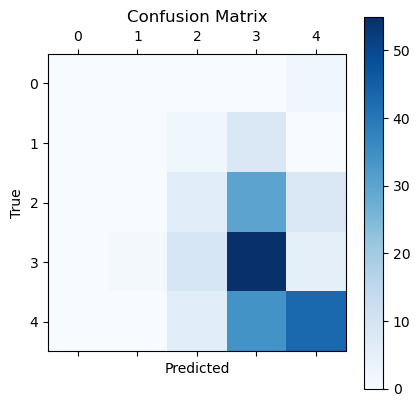

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 假设 RFC 是你训练好的随机森林分类器
RFC.fit(xtrain, ytrain)

# 在测试集上进行预测
y_pred = RFC.predict(xtest)

# 计算混淆矩阵
cm = confusion_matrix(ytest, y_pred)

# 绘制混淆矩阵
plt.matshow(cm, cmap='Blues')  # 使用蓝色调色板
plt.colorbar()  # 显示颜色条
plt.xlabel('Predicted')  # x轴标签
plt.ylabel('True')  # y轴标签
plt.title('Confusion Matrix')  # 标题
plt.savefig('随机森林混淆矩阵.png', dpi=500, bbox_inches='tight')
plt.show()



In [21]:
#准确率
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, p)) 

0.49760765550239233


# 决策树建模

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
DTR = DecisionTreeClassifier(random_state=922)
DTR.fit(xtrain,ytrain)
p1 = DTR.predict(xtest)

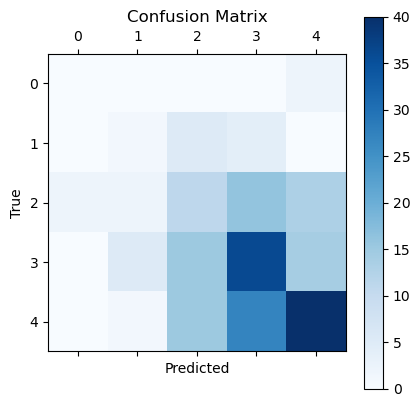

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



# 计算混淆矩阵
cm = confusion_matrix(ytest, p1)

# 绘制混淆矩阵
plt.matshow(cm, cmap='Blues')  # 使用蓝色调色板
plt.colorbar()  # 显示颜色条
plt.xlabel('Predicted')  # x轴标签
plt.ylabel('True')  # y轴标签
plt.title('Confusion Matrix')  # 标题
plt.savefig('决策树混淆矩阵.png', dpi=500, bbox_inches='tight')
plt.show()


In [25]:
#准确率
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, p1)) 

0.42105263157894735


# 逻辑回归

In [26]:
from sklearn.linear_model import LogisticRegression 

In [27]:
LRC =LogisticRegression (random_state=922)

In [28]:
LRC.fit(xtrain,ytrain)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=922)

In [29]:
p4 = LRC.predict(xtest)

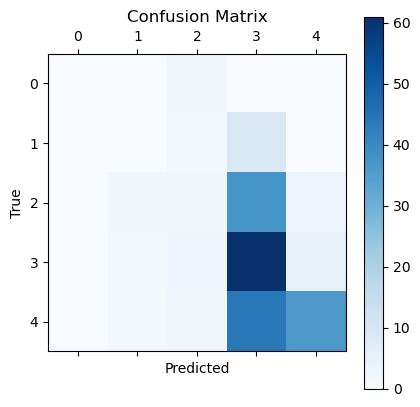

In [30]:
# 计算混淆矩阵
cm = confusion_matrix(ytest, p4)

# 绘制混淆矩阵
plt.matshow(cm, cmap='Blues')  # 使用蓝色调色板
plt.colorbar()  # 显示颜色条
plt.xlabel('Predicted')  # x轴标签
plt.ylabel('True')  # y轴标签
plt.title('Confusion Matrix')  # 标题
plt.savefig('逻辑回归混淆矩阵.png', dpi=500, bbox_inches='tight')
plt.show()


In [31]:
#准确率
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, p4)) 

0.47368421052631576


# K近邻

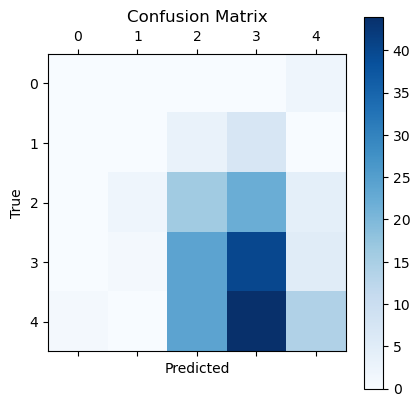

准确率: 0.42105263157894735


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# 创建并训练KNN模型
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(xtrain, ytrain)

# 使用模型进行预测
p5 = KNN.predict(xtest)

# 绘制混淆矩阵
# 计算混淆矩阵
cm = confusion_matrix(ytest, p5)

# 绘制混淆矩阵
plt.matshow(cm, cmap='Blues')  # 使用蓝色调色板
plt.colorbar()  # 显示颜色条
plt.xlabel('Predicted')  # x轴标签
plt.ylabel('True')  # y轴标签
plt.title('Confusion Matrix')  # 标题
plt.savefig('KNN混淆矩阵.png', dpi=500, bbox_inches='tight')
plt.show()

# 计算准确率
accuracy = accuracy_score(ytest, p1)
print("准确率:", accuracy)


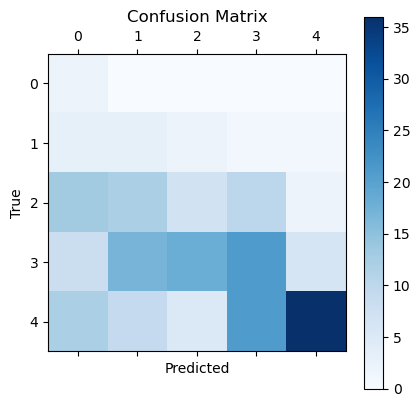

准确率: 0.33014354066985646


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# 创建并训练朴素贝叶斯模型
NB = GaussianNB()
NB.fit(xtrain, ytrain)

# 使用模型进行预测
p_nb = NB.predict(xtest)

# 绘制混淆矩阵
# 计算混淆矩阵
cm = confusion_matrix(ytest, p_nb)

# 绘制混淆矩阵
plt.matshow(cm, cmap='Blues')  # 使用蓝色调色板
plt.colorbar()  # 显示颜色条
plt.xlabel('Predicted')  # x轴标签
plt.ylabel('True')  # y轴标签
plt.title('Confusion Matrix')  # 标题
plt.savefig('朴素贝叶斯混淆矩阵.png', dpi=500, bbox_inches='tight')
plt.show()

# 计算准确率
accuracy = accuracy_score(ytest, p_nb)
print("准确率:", accuracy)


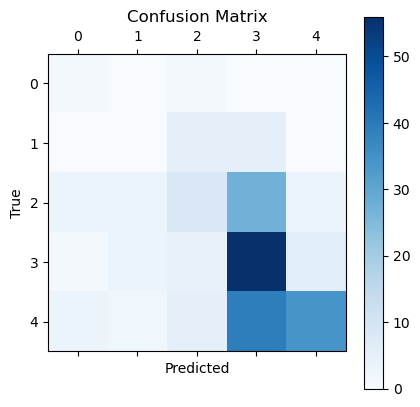

准确率: 0.47368421052631576


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# 创建并训练SVM模型
SVM = SVC(kernel='linear')
SVM.fit(xtrain, ytrain)

# 使用模型进行预测
p_svm = SVM.predict(xtest)

# 绘制混淆矩阵
# 计算混淆矩阵
cm = confusion_matrix(ytest, p_svm)

# 绘制混淆矩阵
plt.matshow(cm, cmap='Blues')  # 使用蓝色调色板
plt.colorbar()  # 显示颜色条
plt.xlabel('Predicted')  # x轴标签
plt.ylabel('True')  # y轴标签
plt.title('Confusion Matrix')  # 标题
plt.savefig('支持向量机混淆矩阵.png', dpi=500, bbox_inches='tight')
plt.show()

# 计算准确率
accuracy = accuracy_score(ytest, p_svm)
print("准确率:", accuracy)
